## All you need is love… And a pet!

<img src="img/dataset-cover.jpg" width="920">

Here we are going to build a classifier to predict whether an animal from an animal shelter will be adopted or not (aac_intakes_outcomes.csv, available at: https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/version/1#aac_intakes_outcomes.csv). You will be working with the following features:

1. *animal_type:* Type of animal. May be one of 'cat', 'dog', 'bird', etc.
2. *intake_year:* Year of intake
3. *intake_condition:* The intake condition of the animal. Can be one of 'normal', 'injured', 'sick', etc.
4. *intake_number:* The intake number denoting the number of occurrences the animal has been brought into the shelter. Values higher than 1 indicate the animal has been taken into the shelter on more than one occasion.
5. *intake_type:* The type of intake, for example, 'stray', 'owner surrender', etc.
6. *sex_upon_intake:* The gender of the animal and if it has been spayed or neutered at the time of intake
7. *age_upon\_intake_(years):* The age of the animal upon intake represented in years
8. *time_in_shelter_days:* Numeric value denoting the number of days the animal remained at the shelter from intake to outcome.
9. *sex_upon_outcome:* The gender of the animal and if it has been spayed or neutered at time of outcome
10. *age_upon\_outcome_(years):* The age of the animal upon outcome represented in years
11. *outcome_type:* The outcome type. Can be one of ‘adopted’, ‘transferred’, etc.

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from itertools import combinations 
import ast
from sklearn.linear_model import LogisticRegression
import seaborn as sn
%matplotlib inline

data_folder = './data/'

### A) Load the dataset and convert categorical features to a suitable numerical representation (use dummy-variable encoding). 
- Split the data into a training set (80%) and a test set (20%). Pair each feature vector with the corresponding label, i.e., whether the outcome_type is adoption or not. 
- Standardize the values of each feature in the data to have mean 0 and variance 1.

The use of external libraries is not permitted in part A, except for numpy and pandas. 
You can drop entries with missing values.

In [37]:
columns = ['animal_type', 'intake_year', 'intake_condition', 'intake_number', 'intake_type', 'sex_upon_intake', \
          'age_upon_intake_(years)', 'time_in_shelter_days', 'sex_upon_outcome', 'age_upon_outcome_(years)', \
          'outcome_type']
original_data = pd.read_csv(data_folder+'aac_intakes_outcomes.csv', usecols=columns)

print(len(original_data))

print(original_data['outcome_type'].unique())
print(original_data['sex_upon_outcome'].unique())
print(original_data['animal_type'].unique())
print(original_data['intake_condition'].unique())
print(original_data['intake_type'].unique())
print(original_data['sex_upon_intake'].unique())
original_data.head()

79672
['Return to Owner' 'Transfer' 'Adoption' 'Euthanasia' 'Died' 'Rto-Adopt'
 'Missing' 'Disposal' nan 'Relocate']
['Neutered Male' 'Spayed Female' 'Intact Female' 'Intact Male' 'Unknown'
 nan]
['Dog' 'Cat' 'Other' 'Bird']
['Normal' 'Injured' 'Aged' 'Sick' 'Other' 'Feral' 'Pregnant' 'Nursing']
['Stray' 'Public Assist' 'Owner Surrender' 'Euthanasia Request' 'Wildlife']
['Neutered Male' 'Spayed Female' 'Intact Female' 'Intact Male' 'Unknown'
 nan]


,outcome_type,sex_upon_outcome,age_upon_outcome_(years),animal_type,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days
0,Return to Owner,Neutered Male,10.0,Dog,Normal,Stray,Neutered Male,10.0,2017,1.0,0.588194
1,Return to Owner,Neutered Male,7.0,Dog,Normal,Public Assist,Neutered Male,7.0,2014,2.0,1.259722
2,Return to Owner,Neutered Male,6.0,Dog,Normal,Public Assist,Neutered Male,6.0,2014,3.0,1.113889
3,Transfer,Neutered Male,10.0,Dog,Normal,Owner Surrender,Neutered Male,10.0,2014,1.0,4.970139
4,Return to Owner,Neutered Male,16.0,Dog,Injured,Public Assist,Neutered Male,16.0,2013,1.0,0.119444


In [33]:
original_data.dtypes

outcome_type                 object
sex_upon_outcome             object
age_upon_outcome_(years)    float64
animal_type                  object
intake_condition             object
intake_type                  object
sex_upon_intake              object
age_upon_intake_(years)     float64
intake_year                   int64
intake_number               float64
time_in_shelter_days        float64
dtype: object

In [44]:
print(original_data['outcome_type'].dtype)
test = pd.get_dummies(data = original_data)
test.head()

object


,age_upon_outcome_(years),age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days,outcome_type_Adoption,outcome_type_Died,outcome_type_Disposal,outcome_type_Euthanasia,outcome_type_Missing,...,intake_type_Euthanasia Request,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray,intake_type_Wildlife,sex_upon_intake_Intact Female,sex_upon_intake_Intact Male,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown
0,10.0,10.0,2017,1.0,0.588194,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
1,7.0,7.0,2014,2.0,1.259722,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
2,6.0,6.0,2014,3.0,1.113889,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
3,10.0,10.0,2014,1.0,4.970139,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
4,16.0,16.0,2013,1.0,0.119444,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False


In [65]:
# Make a copy
original_data_A = original_data.copy()
# Remove missing values
original_data_A.dropna(inplace = True)
print(f"Length dataset after removing NaN values : {len(original_data_A)}")
# Convert categorical features to numerical
original_data_A = pd.get_dummies(data = original_data_A)

train_set = original_data_A.sample(frac=0.8, random_state=42)
test_set = original_data_A.drop(train_set.index)

print(f"Length of the train dataset : {len(train_set)}")
print(f"Length of the test dataset : {len(test_set)}")
#print(set(train_set.index).intersection(test_set.index)) # check

y_train = 1*(train_set['outcome_type_Adoption'])
y_test =  1*(test_set['outcome_type_Adoption'])

X_train = train_set.drop('outcome_type_Adoption', axis = 'columns')
X_test = test_set.drop('outcome_type_Adoption', axis = 'columns')

# standardize columns
def standardize(df):
    for col in ['age_upon_outcome_(years)', 'age_upon_intake_(years)', 'intake_year', 'intake_number', 'time_in_shelter_days']:
        if df[col].dtype != 'object':
            df[col] = (df[col] - df[col].mean())/df[col].std()
            #print(df[col].mean())
            #print(df[col].std())
    for col in [col for col in df.columns if col not in ['age_upon_outcome_(years)', 'age_upon_intake_(years)', 'intake_year', 'intake_number', 'time_in_shelter_days']]:
        df[col] = df[col].astype(int)
    return df

X_train = standardize(X_train)
X_test = standardize(X_test)

print(np.array(y_train))
X_test.head()

Length dataset after removing NaN values : 79661
Length of the train dataset : 63729
Length of the test dataset : 15932
[1 1 1 ... 0 0 1]


,age_upon_outcome_(years),age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days,outcome_type_Died,outcome_type_Disposal,outcome_type_Euthanasia,outcome_type_Missing,outcome_type_Relocate,...,intake_type_Euthanasia Request,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray,intake_type_Wildlife,sex_upon_intake_Intact Female,sex_upon_intake_Intact Male,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown
2,1.323688,1.337535,-1.077559,4.188325,-0.374547,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
5,4.421208,4.441039,-1.840838,-0.280493,-0.380282,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
15,3.732870,3.751372,-1.840838,-0.280493,-0.143983,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
20,4.765377,4.785873,-0.314280,-0.280493,-0.378643,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
22,4.421208,4.441039,-0.314280,-0.280493,0.144304,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


### B) Train a logistic regression classifier on your training set. Logistic regression returns probabilities as predictions, so in order to arrive at a binary prediction, you need to put a threshold on the predicted probabilities. 
- For the decision threshold of 0.5, present the performance of your classifier on the test set by displaying the confusion matrix. Based on the confusion matrix, manually calculate accuracy, precision, recall, and F1-score with respect to the positive and the negative class. 

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [75]:
# Initialize the logistic regression model
logreg_model = LogisticRegression()

# Train the model
logreg_model.fit(X_train, y_train)
print(f" Classes in the logreg model : {logreg_model.classes_}")
# Make predictions on the test set
y_pred_proba = logreg_model.predict_proba(X_test)
y_pred = y_pred_proba[:,1] > 0.5 # second column for True value

print(y_pred)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

 Classes in the logreg model : [0 1]
[False False False ... False False False]
Accuracy: 0.9999372332412754
Confusion Matrix:
[[9208    1]
 [   0 6723]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9209
           1       1.00      1.00      1.00      6723

    accuracy                           1.00     15932
   macro avg       1.00      1.00      1.00     15932
weighted avg       1.00      1.00      1.00     15932



### C) Vary the value of the threshold in the range from 0 to 1 and visualize the value of accuracy, precision, recall, and F1-score (with respect to both classes) as a function of the threshold.

c:\Users\Maxime\anaconda3\envs\ada\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


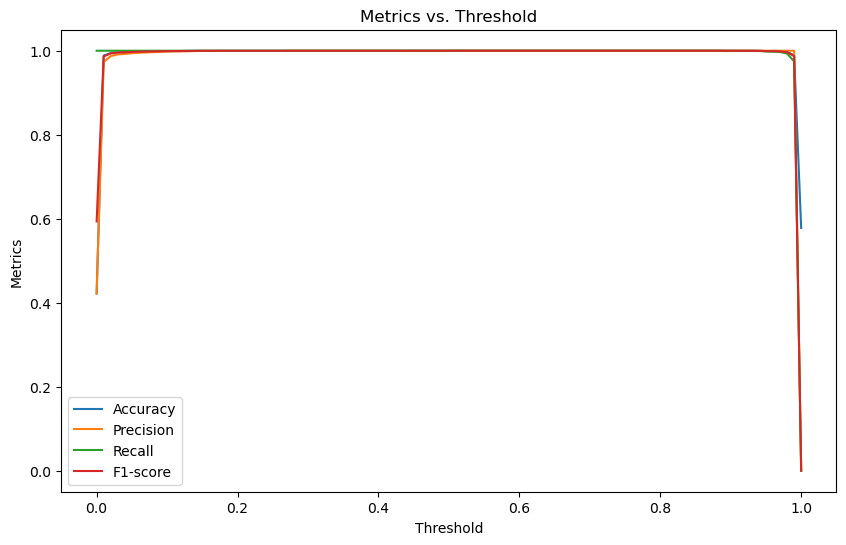

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Initialize the logistic regression model
logreg_model = LogisticRegression()

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_proba = logreg_model.predict_proba(X_test)
y_true = y_test

# Vary the threshold from 0 to 1
thresholds = np.arange(0, 1.01, 0.01)

# Lists to store evaluation metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Compute metrics for each threshold
for threshold in thresholds:
    y_pred = (y_pred_proba[:, 1] > threshold).astype(int)

    accuracy_list.append(accuracy_score(y_true, y_pred))
    precision_list.append(precision_score(y_true, y_pred))
    recall_list.append(recall_score(y_true, y_pred))
    f1_list.append(f1_score(y_true, y_pred))

# Plotting the metrics
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracy_list, label='Accuracy')
plt.plot(thresholds, precision_list, label='Precision')
plt.plot(thresholds, recall_list, label='Recall')
plt.plot(thresholds, f1_list, label='F1-score')
plt.xlabel('Threshold')
plt.ylabel('Metrics')
plt.title('Metrics vs. Threshold')
plt.legend()
plt.show()

### D) Plot in a bar chart the coefficients of the logistic regression sorted by their contribution to the prediction.

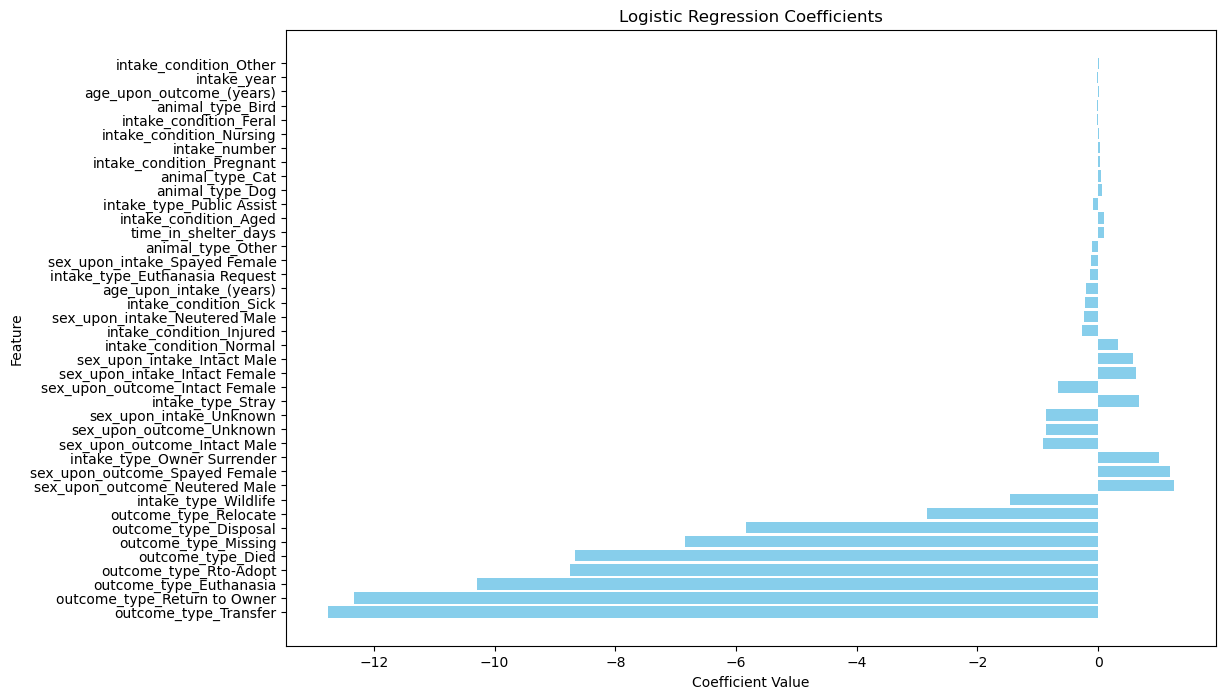

In [77]:
# Get the feature names
feature_names = X_train.columns

# Get the coefficients and feature names
coefficients = logreg_model.coef_[0]

# Create a DataFrame to store coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient values
coefficients_df['Absolute Coefficient'] = np.abs(coefficients_df['Coefficient'])
sorted_coefficients_df = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.barh(sorted_coefficients_df['Feature'], sorted_coefficients_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.show()


## Question 1: Which of the following metrics is most suitable when you are dealing with unbalanced classes?

- a) F1 Score
- b) Recall
- c) Precision
- d) Accuracy

In [ ]:
# Answer : F1 score ✅

## Question 2: You are working on a binary classification problem. You trained a model on a training dataset and got the following confusion matrix on the test dataset. What is true about the evaluation metrics (rounded to the second decimal point):

|            | Pred = NO|Pred=YES|
|------------|----------|--------|
| Actual NO  |    50    |   10   |
| Actual YES |    5     |   100  |

- a) Accuracy is 0.95
- b) Accuracy is 0.85
- c) False positive rate is 0.95
- d) True positive rate is 0.95

In [ ]:
# Answer : 
# accuracy = 150 / 165 = 0.91
# FPR = 10/60 = 0.17   "FPR = proportion of all negative (false positive --> they are actual negative) that yield to positive (because they are false)" 
# TPR = 100/105 = 0.95 ✅